In [325]:
!pip3 install geopandas


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [326]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

In [327]:
!pip install folium


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [328]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[34.052235, -118.243683],
               zoom_start=11,
               tiles='cartodbpositron')

In [329]:
from pathlib import Path

DATA_DIR = Path("../data/")

def read_dataset_file(path: Path) -> np.lib.npyio.NpzFile:
    return np.load(file=path, allow_pickle=True)

metr_la = read_dataset_file(DATA_DIR / "metr_la_new.npz")
metr_la

NpzFile '../data/metr_la_new.npz' with keys: num_timestamps, num_nodes, first_timestamp_datetime, last_timestamp_datetime, timestamp_frequency...

In [330]:
metr_la["timestamp_frequency"].item()

datetime.timedelta(seconds=300)

In [331]:
EDGES_KEY = "edges"
TARGETS_KEY = "targets"
SPATIAL_FEATURES_KEY = "spatial_node_features"

In [332]:
metr_la[EDGES_KEY]

array([[  0,  37],
       [  0,  54],
       [  0, 116],
       ...,
       [206, 155],
       [206, 159],
       [206, 163]], dtype=int32)

In [333]:
metr_la_targets = metr_la[TARGETS_KEY]
metr_la_targets

array([[64.375   , 67.625   , 67.125   , ..., 59.25    , 69.      ,
        61.875   ],
       [62.666668, 68.55556 , 65.44444 , ..., 55.88889 , 68.44444 ,
        62.875   ],
       [64.      , 63.75    , 60.      , ..., 61.375   , 69.85714 ,
        62.      ],
       ...,
       [67.      , 59.666668, 69.55556 , ..., 63.333332, 67.44444 ,
        61.22222 ],
       [66.75    , 62.25    , 66.      , ..., 63.      , 67.875   ,
        63.5     ],
       [65.111115, 66.888885, 66.77778 , ..., 63.555557, 68.666664,
        61.77778 ]], dtype=float32)

In [390]:
timestamps = pd.date_range(start=metr_la["first_timestamp_datetime"].item(),
                           end=metr_la["last_timestamp_datetime"].item(),
                           freq="5min",
                           )
timestamps

DatetimeIndex(['2012-03-01 00:00:00', '2012-03-01 00:05:00',
               '2012-03-01 00:10:00', '2012-03-01 00:15:00',
               '2012-03-01 00:20:00', '2012-03-01 00:25:00',
               '2012-03-01 00:30:00', '2012-03-01 00:35:00',
               '2012-03-01 00:40:00', '2012-03-01 00:45:00',
               ...
               '2012-06-27 23:10:00', '2012-06-27 23:15:00',
               '2012-06-27 23:20:00', '2012-06-27 23:25:00',
               '2012-06-27 23:30:00', '2012-06-27 23:35:00',
               '2012-06-27 23:40:00', '2012-06-27 23:45:00',
               '2012-06-27 23:50:00', '2012-06-27 23:55:00'],
              dtype='datetime64[ns]', length=34272, freq='5T')

In [335]:
# heat_data = [[r['pickup_latitude'], r['pickup_longitude']] for _, r in df.iterrows()]
time = 0
metr_la_coords = metr_la[SPATIAL_FEATURES_KEY]

metr_la_coords.shape

(1, 207, 2)

In [336]:
df = pd.DataFrame(metr_la_coords[0], columns=['latitude', 'longitude'])

# HeatMap(df, radius=10).add_to(m)

In [337]:
m

In [338]:
!pip install osmnx


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [339]:
!pip install shapely


[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [340]:
import shapely
from shapely.geometry import Point, Polygon, LineString
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, GeometryCollection, LineString
import json

In [341]:
multipoints = MultiPoint([[a, b] for a, b in metr_la_coords[0]])

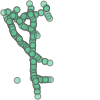

In [342]:
multipoints

In [343]:
geojson = shapely.geometry.mapping(multipoints)
geojson

{'type': 'MultiPoint',
 'coordinates': ((34.15496826171875, -118.31829071044922),
  (34.1162109375, -118.23799133300781),
  (34.11640930175781, -118.23818969726562),
  (34.072479248046875, -118.2677230834961),
  (34.07141876220703, -118.26571655273438),
  (34.069129943847656, -118.25932312011719),
  (34.053680419921875, -118.23368835449219),
  (34.13486099243164, -118.22931671142578),
  (34.202640533447266, -118.47351837158203),
  (34.15562057495117, -118.46859741210938),
  (34.16415023803711, -118.38223266601562),
  (34.15690994262695, -118.22469329833984),
  (34.078208923339844, -118.28794860839844),
  (34.15660095214844, -118.30265808105469),
  (34.189491271972656, -118.47437286376953),
  (34.07006072998047, -118.26245880126953),
  (34.07313919067383, -118.23387908935547),
  (34.07732009887695, -118.2818603515625),
  (34.20671844482422, -118.19992065429688),
  (34.120948791503906, -118.339111328125),
  (34.120731353759766, -118.33927917480469),
  (34.205841064453125, -118.1980285644

In [344]:
colors = ['green', 'yellow', 'red']

In [389]:
time = 18*12 + 288 * 6
for i, point in enumerate(geojson['coordinates']):
    normal_vel = (metr_la_targets[time, i]) / 75
    sensor_color = colors[0]
    if normal_vel < 0.5 and normal_vel > 0.3:
        sensor_color = colors[1]
    elif normal_vel <= 0.3:
        sensor_color = colors[2]
    folium.CircleMarker(list(point), radius=3, fill=True, color=sensor_color, fill_color=sensor_color, fill_opacity=0.6).add_to(m)

m

In [346]:
metr_la_edges = metr_la[EDGES_KEY]
metr_la_edges

array([[  0,  37],
       [  0,  54],
       [  0, 116],
       ...,
       [206, 155],
       [206, 159],
       [206, 163]], dtype=int32)

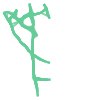

In [347]:
multiline = MultiLineString([LineString([Point(metr_la_coords[0][start]), Point(metr_la_coords[0][end])])
                            for start, end in metr_la_edges])
multiline

In [348]:
geojson_line = shapely.geometry.mapping(multiline)
geojson_line

{'type': 'MultiLineString',
 'coordinates': (((34.15496826171875, -118.31829071044922),
   (34.15541076660156, -118.2957534790039)),
  ((34.15496826171875, -118.31829071044922),
   (34.15522003173828, -118.29344177246094)),
  ((34.15496826171875, -118.31829071044922),
   (34.15351104736328, -118.32750701904297)),
  ((34.15496826171875, -118.31829071044922),
   (34.156410217285156, -118.30265808105469)),
  ((34.15496826171875, -118.31829071044922),
   (34.155460357666016, -118.30841064453125)),
  ((34.1162109375, -118.23799133300781),
   (34.11640930175781, -118.23818969726562)),
  ((34.1162109375, -118.23799133300781),
   (34.13486099243164, -118.22931671142578)),
  ((34.1162109375, -118.23799133300781),
   (34.129638671875, -118.22901153564453)),
  ((34.1162109375, -118.23799133300781),
   (34.11296081542969, -118.24488830566406)),
  ((34.1162109375, -118.23799133300781),
   (34.119659423828125, -118.23143005371094)),
  ((34.11640930175781, -118.23818969726562),
   (34.1162109375, -11

In [349]:
for line, line2 in geojson_line['coordinates']:
    print(line)
    print(line2)
    print("//")

(34.15496826171875, -118.31829071044922)
(34.15541076660156, -118.2957534790039)
//
(34.15496826171875, -118.31829071044922)
(34.15522003173828, -118.29344177246094)
//
(34.15496826171875, -118.31829071044922)
(34.15351104736328, -118.32750701904297)
//
(34.15496826171875, -118.31829071044922)
(34.156410217285156, -118.30265808105469)
//
(34.15496826171875, -118.31829071044922)
(34.155460357666016, -118.30841064453125)
//
(34.1162109375, -118.23799133300781)
(34.11640930175781, -118.23818969726562)
//
(34.1162109375, -118.23799133300781)
(34.13486099243164, -118.22931671142578)
//
(34.1162109375, -118.23799133300781)
(34.129638671875, -118.22901153564453)
//
(34.1162109375, -118.23799133300781)
(34.11296081542969, -118.24488830566406)
//
(34.1162109375, -118.23799133300781)
(34.119659423828125, -118.23143005371094)
//
(34.11640930175781, -118.23818969726562)
(34.1162109375, -118.23799133300781)
//
(34.11640930175781, -118.23818969726562)
(34.1065788269043, -118.25543975830078)
//
(34.1

In [350]:
for line in geojson_line['coordinates']:
    folium.PolyLine([list(line[0]), list(line[1])], color='blue', weight=1, opacity=0.25).add_to(m)

In [351]:
m